# Změna pravděpodobnosti výhry hodu kostkou při zvýšení hodnot na kostce

Zkoumaný jev:
- Žádná hodnota se na žádné kostce neopakuje.
- Jeden hráč má trvale 20 stěnnou kostku s hodnotama z množiny {0 < n <= 20}.
- Druhý hráč má kostku o 20 stěnách s hodnotama z intervalu <n, n+19>, kde n náleží {0 < n <= 20}.

Jak se při různých hodnotách n bude měnit pravděpodobnost **výhry** druhého hráče?
(*Při hodnotách větších než 21 má druhý hráč vždy 100% šanci vyhrát, tudíž nemá smysl testovat*)

In [1]:
import numpy as np
import polars as pl
from random import randint
import matplotlib.pyplot as plt

In [2]:
def test_dice(player2_offset:int) -> np.ndarray:
    results = np.ndarray(100000, bool)
    for index in range(100000):
        player1_res = randint(1,20)
        player2_res = randint(player2_offset, player2_offset + 19)
        results[index] = player2_res > player1_res

    return results

In [3]:
def analyze_results(offset:int, results:np.ndarray) -> dict:
    win_count = len(results[results])
    win_prob = win_count/100000
    win_increase = win_prob - (190/400) #Analytické řešení v případě že oba hráči mají kostky o stejné hodnotě
    increase_percent = win_increase * 100

    return {
        "Die values": f"{offset} - {offset+19}",
        "Wins":win_count,
        "Probability of winning":win_prob,
        "Increase from base chance": win_increase,
        "Increase percentage": increase_percent
    }

In [7]:
results = [analyze_results(offset, test_dice(offset)) for offset in range(1,21)]
complete_results = pl.DataFrame(results)

In [8]:
complete_results

Die values,Wins,Probability of winning,Increase from base chance,Increase percentage
str,i64,f64,f64,f64
"""1 - 20""",47473,0.47473,-0.00027,-0.027
"""2 - 21""",52536,0.52536,0.05036,5.036
"""3 - 22""",57191,0.57191,0.09691,9.691
"""4 - 23""",61803,0.61803,0.14303,14.303
"""5 - 24""",65901,0.65901,0.18401,18.401
…,…,…,…,…
"""16 - 35""",96304,0.96304,0.48804,48.804
"""17 - 36""",97524,0.97524,0.50024,50.024
"""18 - 37""",98625,0.98625,0.51125,51.125


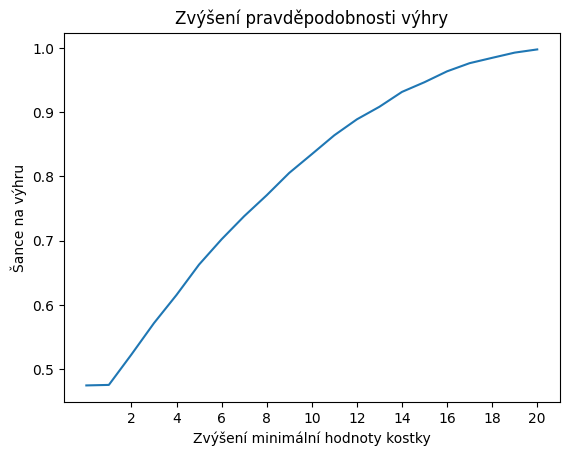

In [6]:
probabilities = [190/400] + complete_results.to_series(2).to_list()
plt.plot(range(0,21), probabilities)
plt.title("Zvýšení pravděpodobnosti výhry")
plt.xlabel("Zvýšení minimální hodnoty kostky")
plt.ylabel("Šance na výhru")
plt.xticks(range(2,21,2))

plt.show()